# E2. Merging exercises

## 1. Swedish demographic data (*)
Go to Swedish-language wikipedia page Sveriges demografi.

###  a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

In [2]:
import pandas as pd
import seaborn as sb


link = "https://sv.wikipedia.org/wiki/Sveriges_demografi"
bef_stat_modern_s= pd.read_html(link, thousands=' ', decimal=',' )[5]
#bef_stat_modern_s[("Folkmängd")] = bef_stat_modern_s[("Folkmängd")].str.replace(' ','').astype(int)
bef_stat_modern_s = bef_stat_modern_s.rename({"Unnamed: 0" : "År"}, axis="columns")

bef_stat_modern_s

,År,Folkmängd,Födda,Döda,Befolkningsförändringar,Nativiteten (per 1000),Dödstalen (per 1000),Befolkningsförändringar (per 1000),Total fertilitet
0,1900,5117000,138139,86146,51993,27.0,16.8,10.2,4.02
1,1901,5156000,139370,82772,56598,27.0,16.1,11.0,4.04
2,1902,5187000,137364,79722,57642,26.5,15.4,11.1,3.95
3,1903,5210000,133896,78610,55286,25.7,15.1,10.6,3.82
4,1904,5241000,134952,80152,54800,25.7,15.3,10.5,3.83
...,...,...,...,...,...,...,...,...,...
116,2016,9995000,117425,90982,26443,11.8,9.2,2.6,1.85
117,2017,10120000,115416,91972,23444,11.4,9.1,2.3,1.79
118,2018,10230000,115832,92185,23647,11.3,9.0,2.3,1.75
119,2019,10327589,114523,88766,28727,11.1,8.7,2.4,1.70


### b) Choose to do some EDA (exploratory data analysis) on this dataset. And draw some relevant graphs.

Text(0.5, 0, 'Årtal')

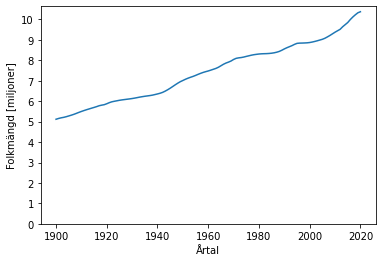

In [3]:
import matplotlib.pyplot as plt


sb.lineplot(data=bef_stat_modern_s, x="År", y="Folkmängd")
plt.yticks([i for i in range(0, int(11e6), int(1e6) )], [f"{i}" for i in range(0, 11)]);
plt.ylabel("Folkmängd [miljoner]")
plt.xlabel("Årtal")






In [4]:
import plotly_express as px
fig = px.line(bef_stat_modern_s, x="År", y="Folkmängd", title="Befolkning i Sverige 1900 till 2020", range_y=[0, 11e6])


fig.show()

### c) Now we want to go backwards in time (before 1900) to see how population has changed in Sweden. Read in the table under history and keep the data of "Folkmängd" from 1570-1865.

In [5]:
bef_stat_hist_s = pd.read_html(link, match= "Vid utgången av år", thousands= "\xa0", decimal=",", header=1, skiprows=[12])[0]

bef_stat_hist_s


,Vid utgången av år,Folkmängd,Totalt,Promille
0,1570,900000,—,—
1,1650,1225000,4063,3.86
2,1700,1485000,5200,3.86
3,1720,1350000,−6 750,"−4,75"
4,1755,1878000,15086,9.48
5,1815,2465000,9783,4.54
6,1865,4099000,32680,10.22
7,1900,5140000,29743,6.48
8,2000,8861000,NaN,NaN
9,2020,10379000,NaN,NaN


In [6]:
col = bef_stat_hist_s.columns[0:2]

bef_stat_hist_s = bef_stat_hist_s[col] 
bool_s = bef_stat_hist_s[bef_stat_hist_s.columns[0]] < 1900
bef_stat_hist_s = bef_stat_hist_s[bool_s] 

bef_stat_hist_s = bef_stat_hist_s.rename({col[0] : "År"}, axis="columns")
bef_stat_hist_s


,År,Folkmängd
0,1570,900000
1,1650,1225000
2,1700,1485000
3,1720,1350000
4,1755,1878000
5,1815,2465000
6,1865,4099000


### d) Now concatenate this with the table from 1900 so that you have population data from 1570 to 2020. Note that you may need to clean the data in order for it to fit properly. Also you may be able to do this in several ways.


In [7]:
bef_tot_s = pd.concat([bef_stat_hist_s, bef_stat_modern_s], ignore_index=True)
bef_tot_s

,År,Folkmängd,Födda,Döda,Befolkningsförändringar,Nativiteten (per 1000),Dödstalen (per 1000),Befolkningsförändringar (per 1000),Total fertilitet
0,1570,900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1650,1225000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1700,1485000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1720,1350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1755,1878000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
123,2016,9995000,117425.0,90982.0,26443.0,11.8,9.2,2.6,1.85
124,2017,10120000,115416.0,91972.0,23444.0,11.4,9.1,2.3,1.79
125,2018,10230000,115832.0,92185.0,23647.0,11.3,9.0,2.3,1.75
126,2019,10327589,114523.0,88766.0,28727.0,11.1,8.7,2.4,1.70


## e) Draw a graph of population data from 1570-2020.

In [8]:
fig = px.line(bef_tot_s, x="År", y="Folkmängd", title="Befolkning i Sverige 1570 till 2020", range_y=[0, 11e6])


fig.show()

## 2. Denmark demographic data (*)
Go to the Danish-language wikipedia page Danmarks demografi.

### a) Read in the table under "Demografiske data" into a DataFrame (*)

In [9]:
link = "https://da.wikipedia.org/wiki/Danmarks_demografi#Demografiske_data"

bef_stat_d = pd.read_html(link, match= "Befolkning", thousands= ".", decimal=",", header=0, skiprows=[1,2],  keep_default_na=False)[0]

bef_stat_d

,År,Befolkning pr. 1. januar,År.1,Befolkning pr. 1. januar.1
0,1769,797584,1976,5065313
1,1787,841806,1977,5079879
2,1801,929001,1978,5096959
3,1834,1230964,1979,5111537
4,1840,1289075,1980,5122065
5,1845,1356877,1981,5123989
6,1850,1414648,1982,5119155
7,1855,1507222,1983,5116464
8,1860,1608362,1984,5112130
9,1870,1784741,1985,5111108


###   b) Clean the data and draw a graph of population against year from 1769-2020. (**)

In [10]:
a, b = bef_stat_d[bef_stat_d.columns[0:2]], bef_stat_d[bef_stat_d.columns[2:5]]

a.columns = ["År", "Befolkning"]
b.columns = ["År", "Befolkning"]

bef_stat_d = pd.concat([a, b], ignore_index=True)

In [11]:
fig = px.line(bef_stat_d, x="År", y="Befolkning", title="Danskjävlar 1769 till 2020", range_y=[0, 7e6])


fig.show()

## 3. Norwegian demographic data (*)
Go to Swedish-language wikipedia page Norges demografi.

### a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

In [12]:
link = "https://sv.wikipedia.org/wiki/Norges_demografi"

bef_stat_n = pd.read_html(link, match= "Naturlig förändring per 1000 invånare", thousands= " ", decimal=",", header=0, keep_default_na=False)[0]

bef_stat_n = bef_stat_n.rename({"Unnamed: 0" : "År"}, axis="columns")
bef_stat_n

,År,Befolkning i tusentals (x 1000),Födda,Döda,Naturlig förändring,Födelsetal per 1000 invånare,Dödstal per 1000 invånare,Naturlig förändring per 1000 invånare,Total fertilitet
0,1900,2231,66229,35345,30884,29.7,15.8,13.8,
1,1901,2255,67303,33821,33482,29.8,15.0,14.8,
2,1902,2276,66494,31670,34824,29.2,13.9,15.3,
3,1903,2288,65470,33847,31623,28.6,14.8,13.8,
4,1904,2298,64143,32895,31248,27.9,14.3,13.6,
...,...,...,...,...,...,...,...,...,...
108,2008,4768,60497,41712,18785,12.7,8.7,3.9,1.96
109,2009,4829,61807,41449,20358,12.8,8.6,4.2,1.98
110,2010,4889,61442,41500,19942,12.6,8.5,4.1,1.95
111,2011,4953,60220,41393,18827,12.1,8.3,3.8,1.88


###  b) You see some missing data in column "Total fertilitet". Go to the English page and read in the data from "Vital statistics since 1900".

In [13]:
link = "https://en.wikipedia.org/wiki/Demographics_of_Norway"

bef_stat_n_e = pd.read_html(link, match= "Crude birth rate", thousands= ",", decimal=".", header=0, keep_default_na=False)[0]

bef_stat_n_e = bef_stat_n_e.rename({"Unnamed: 0" : "År"}, axis="columns")
bef_stat_n_e

,År,Average population,Live births,Deaths,Natural change,Crude birth rate (per 1000),Crude death rate (per 1000),Natural change (per 1000),Total fertility rates[fn 1][5][7]
0,1900,2231000,66229,35345,30884,29.7,15.8,13.8,4.40
1,1901,2255000,67303,33821,33482,29.8,15.0,14.8,4.37
2,1902,2276000,66494,31670,34824,29.2,13.9,15.3,4.26
3,1903,2288000,65470,33847,31623,28.6,14.8,13.8,4.16
4,1904,2298000,64143,32895,31248,27.9,14.3,13.6,4.07
...,...,...,...,...,...,...,...,...,...
117,2017,5258000,56633,40774,15859,10.8,7.8,3.0,1.62
118,2018,5296000,55120,40840,14280,10.4,7.7,2.8,1.56
119,2019,5328000,54495,40684,13811,10.2,7.6,2.6,1.53
120,2020,5367580,52979,40611,12368,9.9,7.5,2.4,1.48


### c) Pick out the fertility column from b) dataset, merge it into a) dataset and clean the data so that you only have columns "År", "Folkmängd", "Fertilitet".

In [18]:
bef_stat_n_tot = pd.merge(bef_stat_n, bef_stat_n_e, on="År",  )
bef_stat_n_tot = bef_stat_n_tot.rename(columns = {"Befolkning i tusentals (x 1000)" : "Folkmängd", "Total fertility rates[fn 1][5][7]" : "Fertilitet"})
bef_stat_n_tot = bef_stat_n_tot[["År", "Folkmängd", "Fertilitet"]]
bef_stat_n_tot

,År,Folkmängd,Fertilitet
0,1900,2231,4.40
1,1901,2255,4.37
2,1902,2276,4.26
3,1903,2288,4.16
4,1904,2298,4.07
...,...,...,...
108,2008,4768,1.96
109,2009,4829,1.98
110,2010,4889,1.95
111,2011,4953,1.88


## 4. Merge Sweden-Norway (*)
Create a population graph and a fertility graph showing Sweden and Norway.

In [41]:
befolking_s_n = pd.merge(bef_stat_modern_s, bef_stat_n_e, on="År")
befolking_s_n

,År,Folkmängd,Födda,Döda,Befolkningsförändringar,Nativiteten (per 1000),Dödstalen (per 1000),Befolkningsförändringar (per 1000),Total fertilitet,Average population,Live births,Deaths,Natural change,Crude birth rate (per 1000),Crude death rate (per 1000),Natural change (per 1000),Total fertility rates[fn 1][5][7]
0,1900,5117000,138139,86146,51993,27.0,16.8,10.2,4.02,2231000,66229,35345,30884,29.7,15.8,13.8,4.40
1,1901,5156000,139370,82772,56598,27.0,16.1,11.0,4.04,2255000,67303,33821,33482,29.8,15.0,14.8,4.37
2,1902,5187000,137364,79722,57642,26.5,15.4,11.1,3.95,2276000,66494,31670,34824,29.2,13.9,15.3,4.26
3,1903,5210000,133896,78610,55286,25.7,15.1,10.6,3.82,2288000,65470,33847,31623,28.6,14.8,13.8,4.16
4,1904,5241000,134952,80152,54800,25.7,15.3,10.5,3.83,2298000,64143,32895,31248,27.9,14.3,13.6,4.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2016,9995000,117425,90982,26443,11.8,9.2,2.6,1.85,5213000,58890,40726,18164,11.3,7.8,3.5,1.71
117,2017,10120000,115416,91972,23444,11.4,9.1,2.3,1.79,5258000,56633,40774,15859,10.8,7.8,3.0,1.62
118,2018,10230000,115832,92185,23647,11.3,9.0,2.3,1.75,5296000,55120,40840,14280,10.4,7.7,2.8,1.56
119,2019,10327589,114523,88766,28727,11.1,8.7,2.4,1.70,5328000,54495,40684,13811,10.2,7.6,2.6,1.53


In [44]:
fig = px.line(befolking_s_n, x="År", y=["Folkmängd", "Average population"], title="Befolkning Sverige och Norge", range_y=[0, 11e6])


fig.show()

In [68]:
befolking_s_n = befolking_s_n.rename(columns = { "Total fertility rates[fn 1][5][7]" : "Fertilitet"})
befolking_s_n["Fertilitet"] = befolking_s_n["Fertilitet"].astype(float)
befolking_s_n["Fertilitet"]

0      4.40
1      4.37
2      4.26
3      4.16
4      4.07
       ... 
116    1.71
117    1.62
118    1.56
119    1.53
120    1.48
Name: Fertilitet, Length: 121, dtype: float64

In [80]:
fig = px.line(befolking_s_n, x="År", y=["Total fertilitet", "Fertilitet"], title="Fertilitet Sverige och Norge", range_y=[0, 5], labels={"value" : "Fertilitet", "variable" : ""})

fig.data[0].name = "Fertilitet Sverige"
fig.data[1].name = "Fertilitet Norge"
fig.show()